## Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

## The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

## Goal:

Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

The Solution is divided into the following sections:

-  Data Understanding and exploration
-  Data Visualisation
-  Data Preparation
-  Model building and evaluation

## Step 1: Data Understanding and exploration :

### 1.1 Reading and Understanding the Data

Let's start with the following steps:

- Importing data using the pandas library
- Understanding the structure of the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from matplotlib import pyplot as plt

In [3]:
# Read the data from csv file

Bike_df = pd.read_csv('day.csv')

In [4]:
# Check the head of the dataset
 
Bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Let's look at the number of rows and columns in the dataset

Bike_df.shape

(730, 16)

In [6]:
#check dataframe for null and datatype 
# Observation : No missing Values
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#check the details of numeriacl data
Bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#check the axes of data
Bike_df.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [9]:
# Understanding the feature name in dataset

Bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
#check the datatypes of data
Bike_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## 1.2 Data Cleaning

### Drop columns that are not useful for analysis

- instant is just a row instance identifier.
- dteday is removed as we have some of date features like mnth and year and weekday already in other columns and also for this analysis we will not consider day to day trend in demand for bikes.


In [11]:
#Before dropping date, let us introduce a days_old variable which indicates how old is the business
Bike_df['days_old'] = (pd.to_datetime(Bike_df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [12]:
Bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [13]:
# Droping instant column as it is index column which has nothing to do with target
Bike_df.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
Bike_df.drop(['dteday'], axis = 1, inplace = True)


In [14]:
Bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [15]:
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
 14  days_old    730 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 85.7 KB


In [16]:
Bike_df.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [17]:
Bike_df.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [18]:
Bike_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
season,1.000000e+00,-3.272230e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584,0.413587
yr,-3.272230e-16,1.000000e+00,-5.149955e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728,0.866026
mnth,8.310321e-01,-5.149955e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764,0.016275
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,0.067534,-0.000023
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542,-0.004619
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543,0.016080


Observation : we can see that features like season, mnth, weekday and weathersit are integers although they should be non-numerical categories.

### 1.3 Handle Missing values

In [19]:
#Print null counts by column
Bike_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
days_old      0
dtype: int64

Observation : There are no null values 

### 1.4 Handling Outliers

In [20]:
#Print number of unique values in all columns
Bike_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
days_old      730
dtype: int64

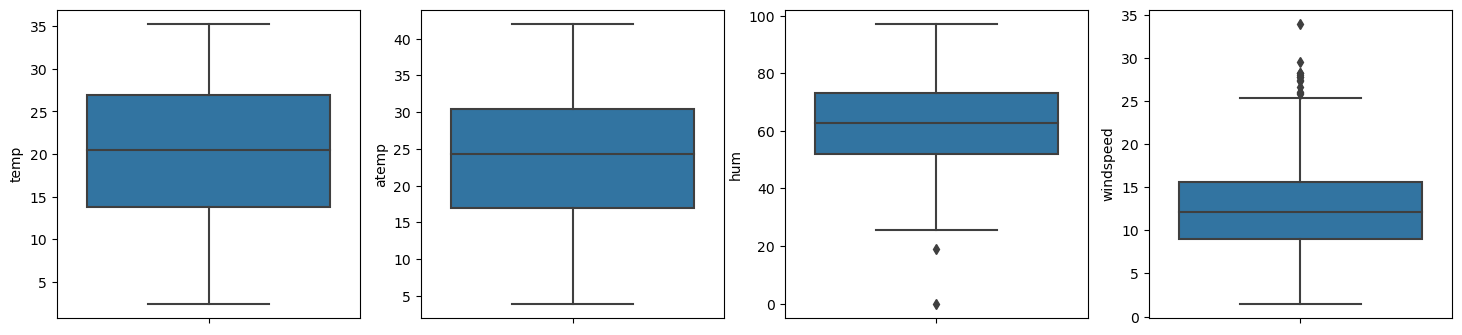

In [21]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=Bike_df)
    i+=1

Observation : From above plot we can see that there are no outliers

### Convert season and weathersit to categorical types

In [22]:
Bike_df.season.replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'},inplace = True)

Bike_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

Bike_df.mnth = Bike_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

Bike_df.weekday = Bike_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
Bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


## Step 2: Data Visualisation :

### 2.1 Visualising the Data

Let's now spend some time doing what is arguably the most important step - understanding the data.

If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

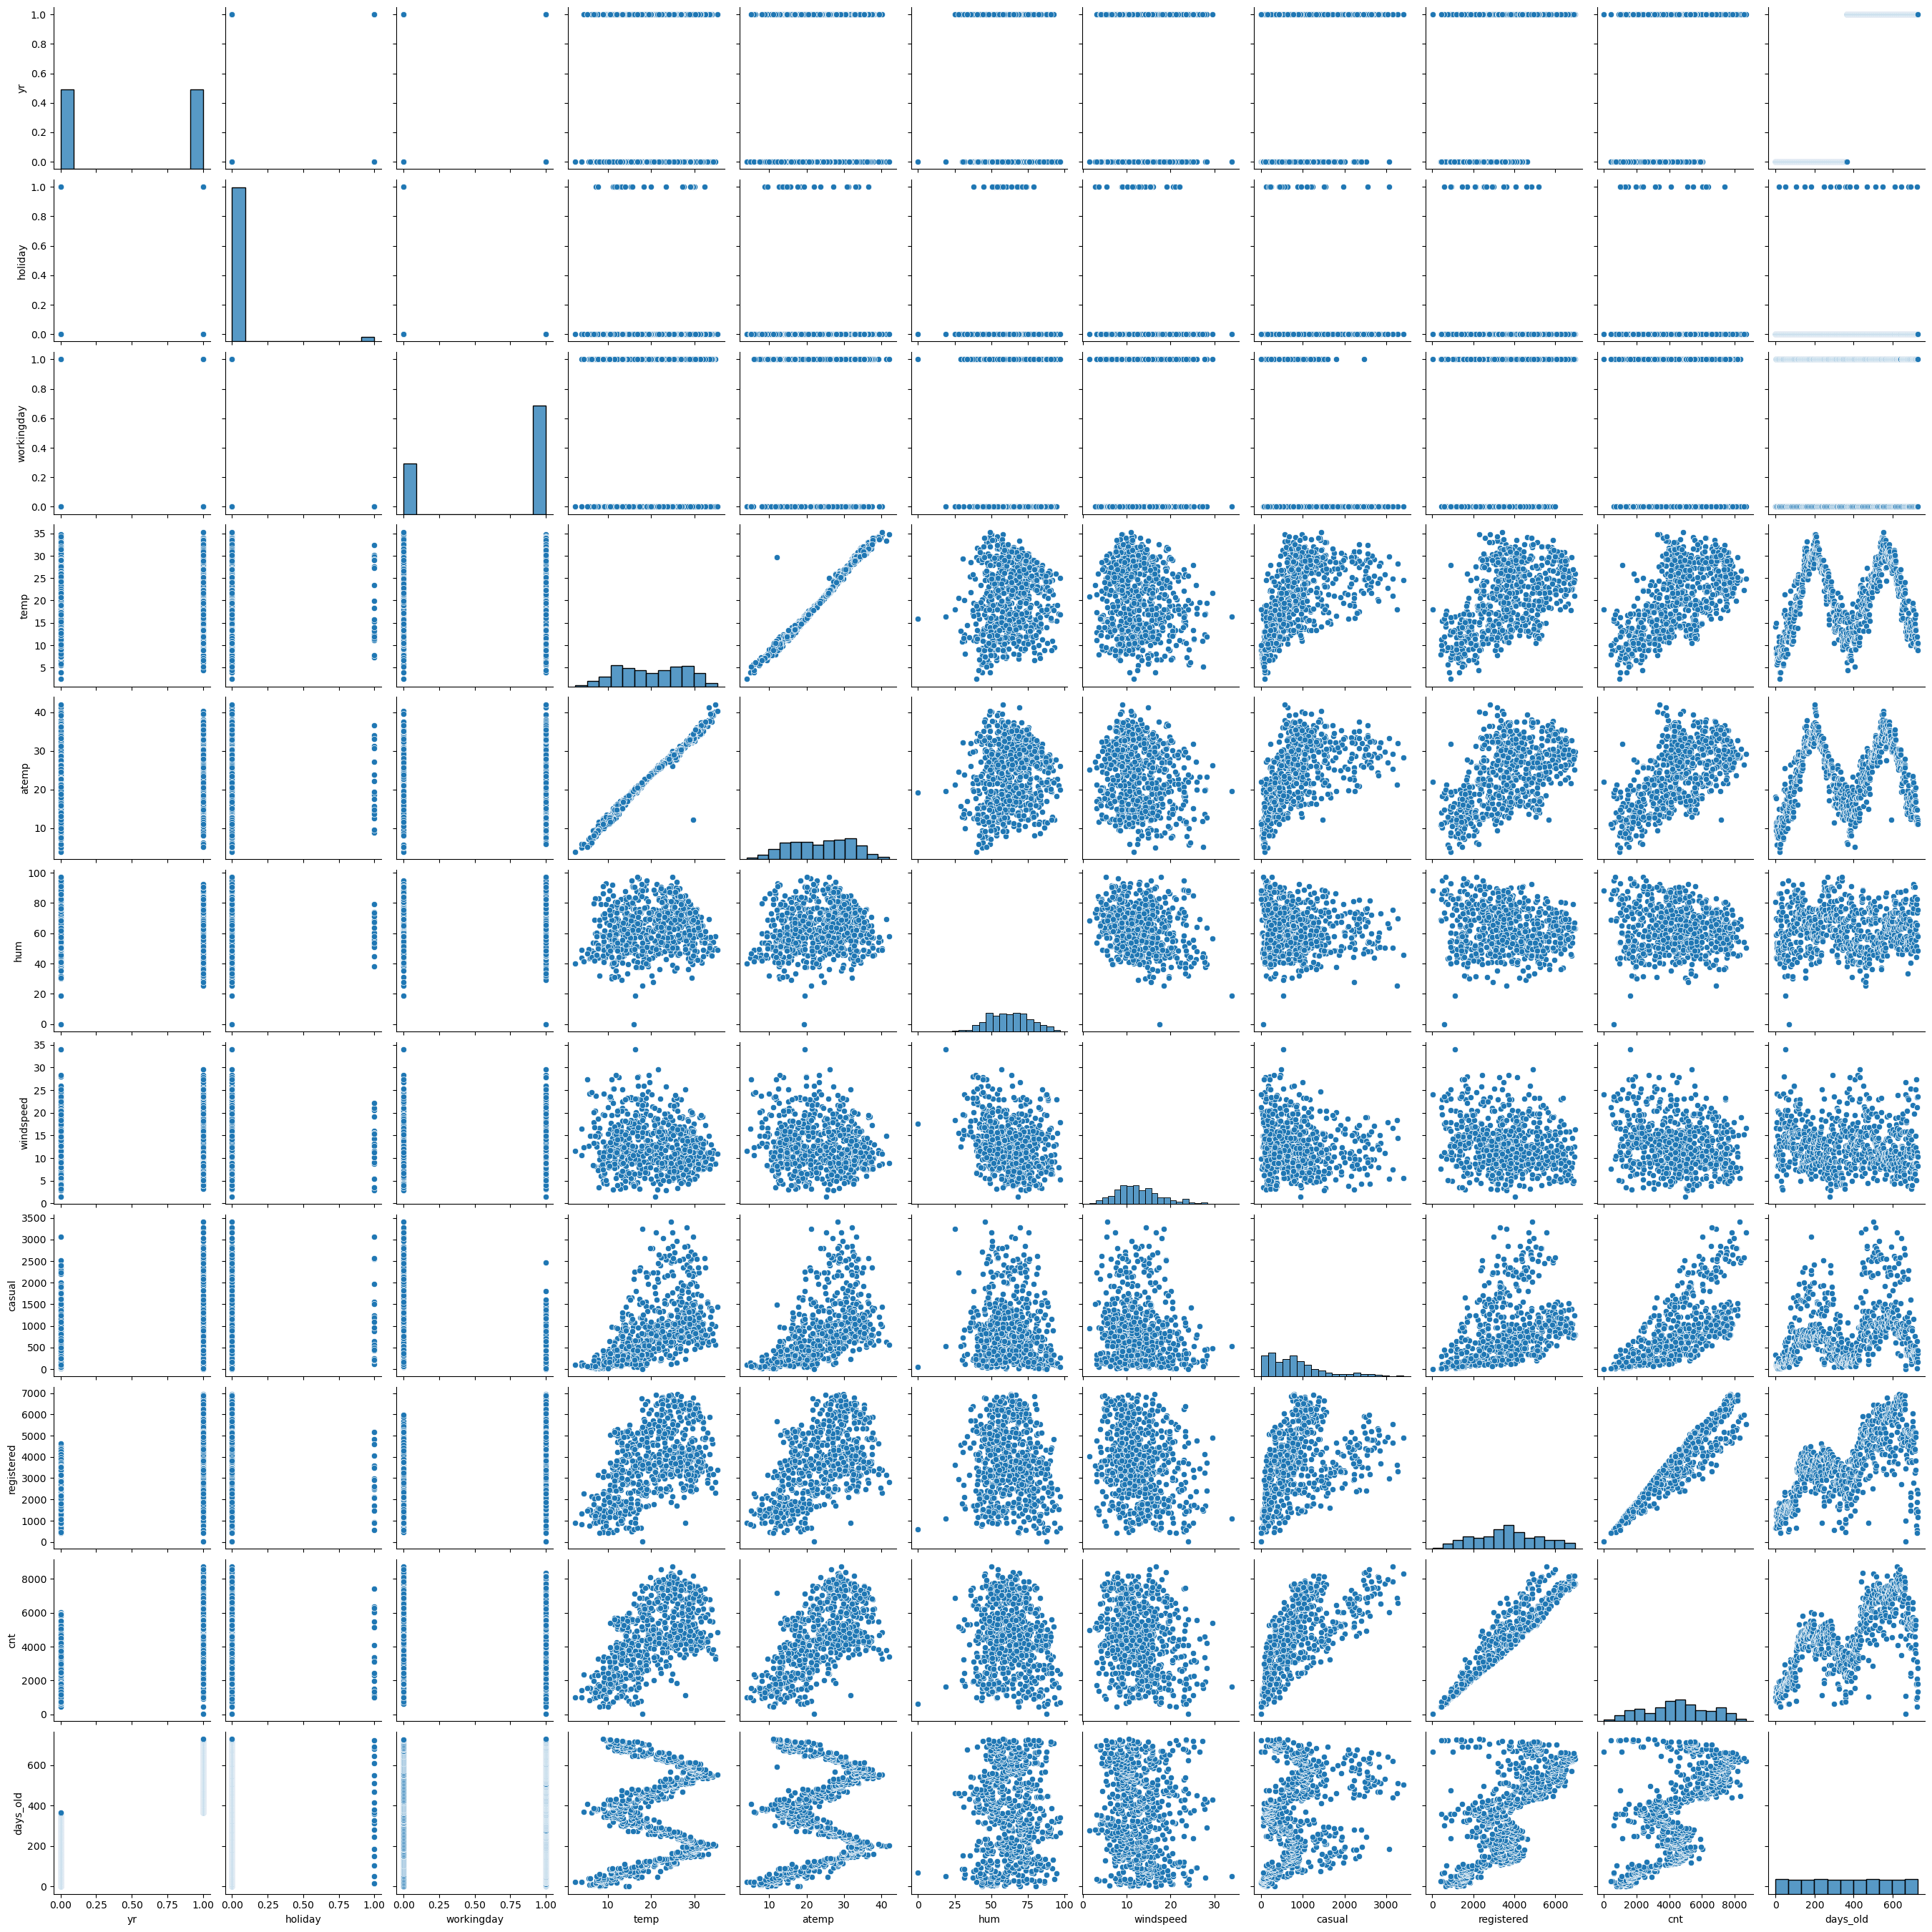

In [23]:
#visualising Numeric variables

sns.pairplot(Bike_df)
plt.show()

### Observation:

- Looks like the temp and atemp has the highest corelation with the target variable cnt
- temp and atemp are highly co-related with each other
- Registered and casual also have some positive correlation with target variable cnt


In [24]:
Bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'days_old'],
      dtype='object')

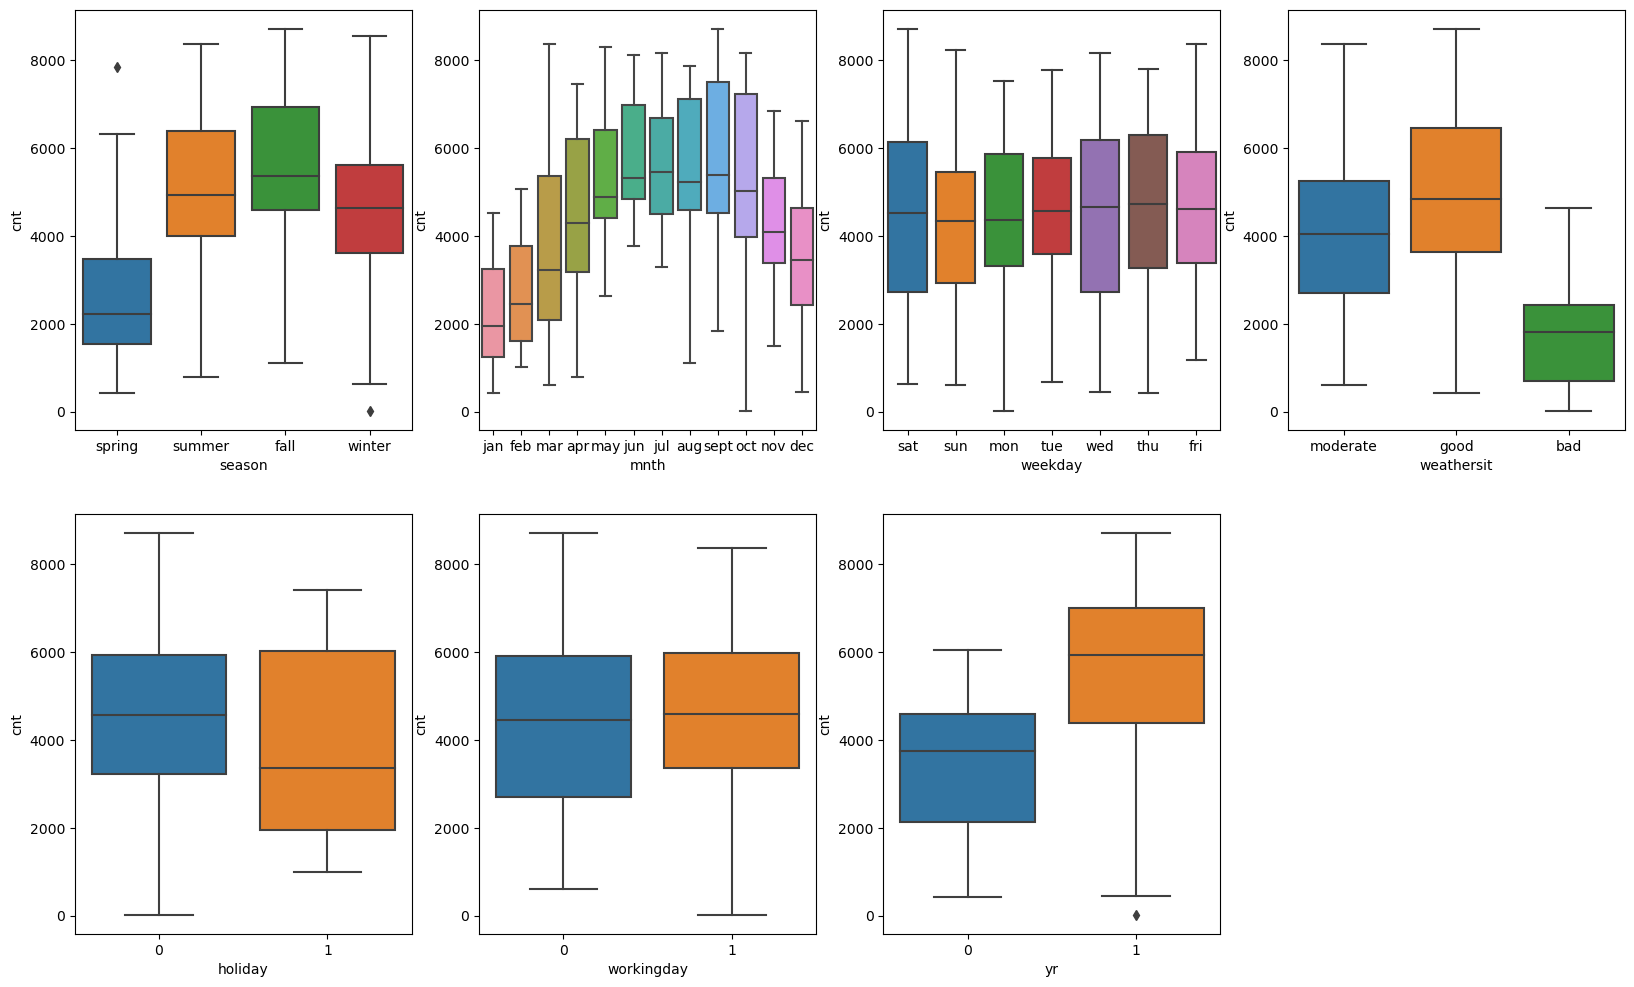

In [25]:
# Visualising Categorical variables
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = Bike_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = Bike_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bike_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bike_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bike_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bike_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = Bike_df)
plt.show()

### Observation : 

- The demand of usage of rental bikes in spring is too low and other seasons i.e the count ranges from 4000 - 6500
- The demand is mostly high from June-September, demand is continuously growing each month till June. September month has highest demand. After September, demand is decreasing
- The median of count is almost same for all weekdays 
- The clear weathershit has highest demand
- When there is a holiday, demand has decreased.
- Demand has increase drastically in the year 2019


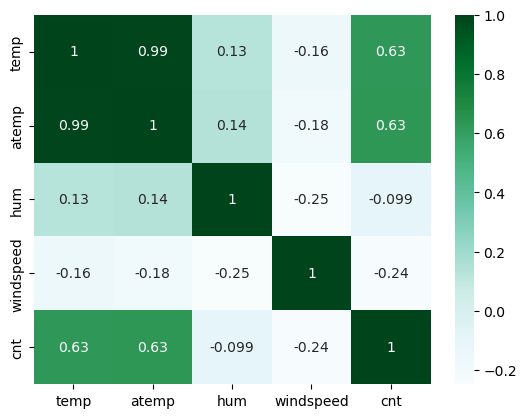

In [26]:
# Checking continuous variables relationship with each other
sns.heatmap(Bike_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

### Observation: 

- temp and atemp has correlation more than .99 means almost 1 which means highly correlated.
- atemp seems to be derived from temp so atemp field can be dropped here only

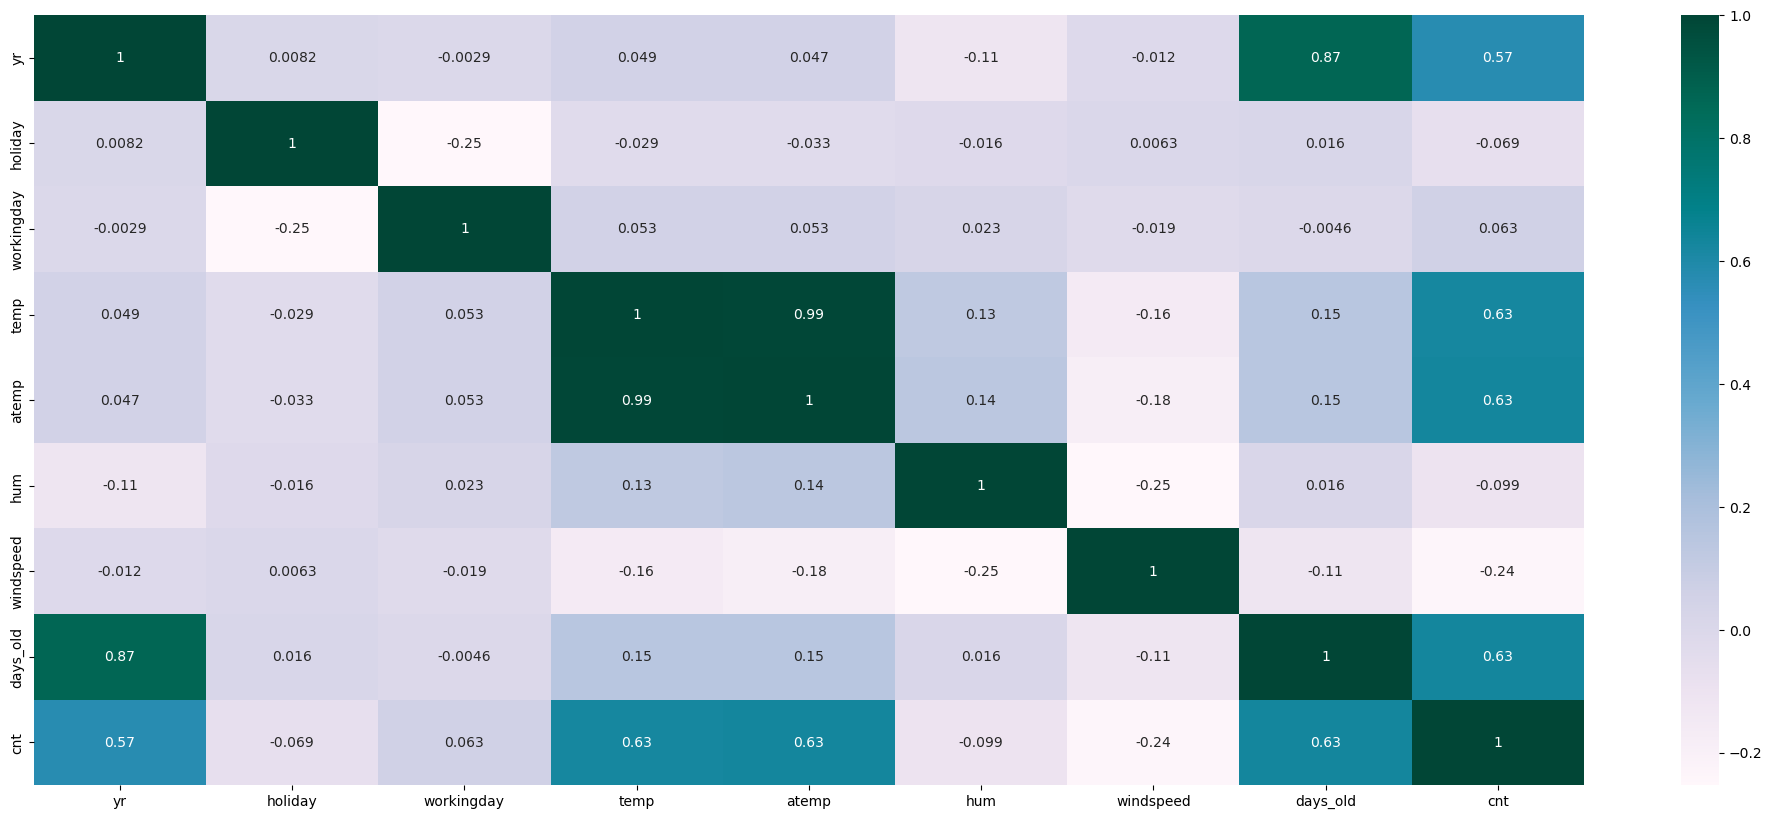

In [27]:
# HeatMap to draw correlation betweeen the variable

#Calculate Correlation
cor = Bike_df[['yr','holiday','workingday','temp','atemp','hum','windspeed','days_old','cnt']].corr()
plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(cor,annot=True, cmap='PuBuGn')
plt.show()

Observation : 

From correlation map we can see temp, atemp and days_old seems to be highly correlated. 
We also see Target variable has a linear relationship with some of the indeptendent variables. Good sign for building a linear regression Model.

### 3. Data Preparation for Linear Regression

#### 3.1 Create dummy variables for all categorical variables

In [28]:
Bike_df = pd.get_dummies(data=Bike_df,columns=["season","mnth","weekday"],drop_first=True)
Bike_df = pd.get_dummies(data=Bike_df,columns=["weathersit"])

Dropping the first columns as (p-1) dummies can explain p categories.
In weathersit first column was not dropped so as to not lose the info about severe weather situation.


In [29]:
#Print columns after creating dummies
Bike_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'days_old', 'season_spring',
       'season_summer', 'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov',
       'mnth_oct', 'mnth_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_bad',
       'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [30]:
Bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,False,False,True,False,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,False,False,False,True,False,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,False,True,False,False,False,False,False,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,False,False,False,False,False,True,False,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,False,False,False,False,False,False,True,False,True,False


### 4. Model Building

#### 4.1 Split Data into training and test

In [31]:
# Checking shape before splitting

Bike_df.shape

(730, 34)

In [32]:
#y to contain only target variable
y=Bike_df.pop('cnt')

#X is all remainign variable also our independent variables
X=Bike_df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
#Inspect independent variables
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,days_old,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,0,...,False,False,True,False,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,1,...,False,False,False,True,False,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,2,...,False,True,False,False,False,False,False,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,3,...,False,False,False,False,False,True,False,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,4,...,False,False,False,False,False,False,True,False,True,False


In [34]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 33)
(219, 33)


#### 4.2 Feature Scaling continuous variables

To make all features in same scale to interpret easily

Following columns are continous to be scaled
temp,hum,windspeed

In [35]:
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [36]:
#Inspect stats fro Training set after scaling
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,days_old
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873,858.600783,3694.350294,0.512409
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619,672.706953,1573.398840,0.292268
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,416.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,336.500000,2628.000000,0.254458
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,738.000000,3729.000000,0.521262
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,1094.500000,4804.000000,0.770233
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3252.000000,6946.000000,1.000000


In [37]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,days_old,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,320,5125,0.936900,...,False,False,False,False,True,False,False,False,False,True
645,1,1,0,0.403972,0.404998,0.731215,0.419004,874,4604,0.884774,...,False,True,False,False,False,False,False,False,False,True
163,0,0,1,0.717562,0.685963,0.509660,0.708724,863,4157,0.223594,...,False,True,False,False,False,False,False,False,True,False
360,0,0,1,0.331287,0.326273,0.785745,0.415925,103,1059,0.493827,...,False,False,False,False,False,True,False,False,False,True
640,1,0,1,0.745598,0.682653,0.817947,0.110593,728,6844,0.877915,...,False,False,False,False,False,False,True,False,False,True


### 4.3 Build a Model using RFE and Automated approach

### Using RFE to eliminate some columns

In [38]:
# Build a Linear Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [40]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', False, 15),
 ('casual', True, 1),
 ('registered', True, 1),
 ('days_old', False, 5),
 ('season_spring', False, 7),
 ('season_summer', False, 9),
 ('season_winter', False, 4),
 ('mnth_aug', False, 12),
 ('mnth_dec', False, 6),
 ('mnth_feb', True, 1),
 ('mnth_jan', False, 11),
 ('mnth_jul', False, 18),
 ('mnth_jun', False, 2),
 ('mnth_mar', False, 10),
 ('mnth_may', False, 8),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 3),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 19),
 ('weekday_sat', False, 17),
 ('weekday_sun', True, 1),
 ('weekday_thu', True, 1),
 ('weekday_tue', False, 16),
 ('weekday_wed', False, 13),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 14)]

### 4.4 Manual elimination
### Function to build a model using statsmodel api

In [53]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm.astype(float)).fit()
    print(lm.summary())
    return lm

Function to calculate VIFs and print them


In [66]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calculated as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values.astype(float), i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [55]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'casual',
       'registered', 'mnth_feb', 'mnth_nov', 'mnth_sept', 'weekday_sun',
       'weekday_thu', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [56]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['windspeed', 'days_old', 'season_spring', 'season_summer',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_jan', 'mnth_jul',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_oct', 'weekday_mon',
       'weekday_sat', 'weekday_tue', 'weekday_wed', 'weathersit_moderate'],
      dtype='object')

In [57]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

In [58]:
X_train_rfe.shape

(511, 15)

### 5. Model 1

Start with all variables selected by RFE

In [62]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     167.9
Date:                Sun, 26 May 2024   Prob (F-statistic):          4.52e-183
Time:                        00:09:02   Log-Likelihood:                -4131.1
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     495   BIC:                             8362.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2373.1199    

In [67]:
get_vif(cols)

               Features    VIF
4                   hum  27.40
3                  temp  17.86
5             windspeed   5.70
2            workingday   5.16
6         season_spring   4.36
8         season_winter   3.22
7         season_summer   2.98
14  weathersit_moderate   2.22
0                    yr   2.10
12          weekday_sat   1.91
10             mnth_jul   1.83
9              mnth_jan   1.68
11            mnth_sept   1.47
13       weathersit_bad   1.27
1               holiday   1.18


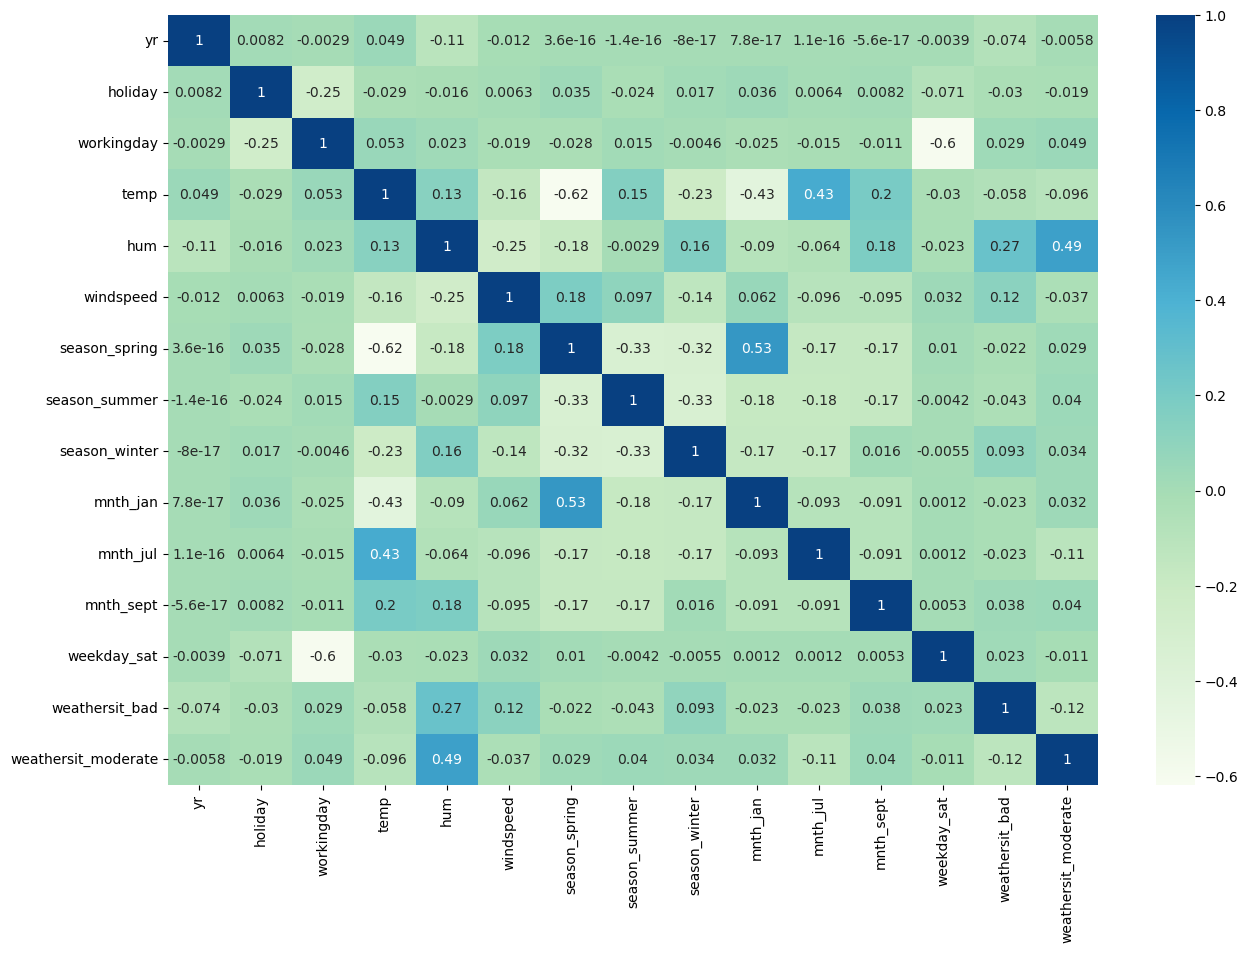

In [61]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(Bike_df[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap='GnBu', annot=True)
plt.show()

#### Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value


### Model 2

In [68]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sun, 26 May 2024   Prob (F-statistic):          3.59e-184
Time:                        00:27:19   Log-Likelihood:                -4131.2
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     496   BIC:                             8356.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2357.7484    

In [69]:
get_vif(cols)

               Features    VIF
4                   hum  26.96
3                  temp  17.27
5             windspeed   5.68
2            workingday   5.15
6         season_spring   4.03
8         season_winter   3.20
7         season_summer   2.98
13  weathersit_moderate   2.21
0                    yr   2.10
11          weekday_sat   1.90
9              mnth_jul   1.82
10            mnth_sept   1.47
12       weathersit_bad   1.26
1               holiday   1.17


#### Dropping the variable hum as it has negative coefficient and is insignificant as it has high p-value


### Model 3

Checking all the columns having p-value > .05 and high VIFs

In [71]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     186.5
Date:                Sun, 26 May 2024   Prob (F-statistic):          1.46e-181
Time:                        00:30:58   Log-Likelihood:                -4140.1
No. Observations:                 511   AIC:                             8308.
Df Residuals:                     497   BIC:                             8368.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1524.3398    

In [72]:
get_vif(cols)

               Features   VIF
3                  temp  8.28
4             windspeed  5.67
2            workingday  5.06
6         season_summer  2.62
5         season_spring  2.47
0                    yr  2.09
7         season_winter  2.07
10          weekday_sat  1.87
8              mnth_jul  1.82
12  weathersit_moderate  1.57
9             mnth_sept  1.42
1               holiday  1.17
11       weathersit_bad  1.09


#### Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value


### Model 4

In [73]:
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.9
Date:                Sun, 26 May 2024   Prob (F-statistic):          4.56e-182
Time:                        00:34:42   Log-Likelihood:                -4141.7
No. Observations:                 511   AIC:                             8309.
Df Residuals:                     498   BIC:                             8364.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1458.3161    

In [74]:
get_vif(cols)

               Features   VIF
2                  temp  7.99
3             windspeed  5.67
1            workingday  4.53
5         season_summer  2.60
4         season_spring  2.35
0                    yr  2.09
6         season_winter  2.02
7              mnth_jul  1.82
9           weekday_sat  1.76
11  weathersit_moderate  1.57
8             mnth_sept  1.42
10       weathersit_bad  1.09


#### Dropping the variable mnth_jul as it has negative coefficient and is insignificant as it has high p-value


### Model 5

In [75]:
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.9
Date:                Sun, 26 May 2024   Prob (F-statistic):          1.57e-182
Time:                        00:36:13   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8311.
Df Residuals:                     499   BIC:                             8362.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1392.1476    

In [76]:
get_vif(cols)

               Features   VIF
2                  temp  6.14
3             windspeed  5.67
1            workingday  4.52
4         season_spring  2.24
0                    yr  2.09
5         season_summer  2.07
6         season_winter  1.79
8           weekday_sat  1.76
10  weathersit_moderate  1.57
7             mnth_sept  1.25
9        weathersit_bad  1.09


#### Dropping the variable temp as it is insignificant as it has high VIF


### Model 6

In [77]:
cols = ['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     163.3
Date:                Sun, 26 May 2024   Prob (F-statistic):          1.84e-150
Time:                        00:38:39   Log-Likelihood:                -4222.0
No. Observations:                 511   AIC:                             8466.
Df Residuals:                     500   BIC:                             8513.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4634.1026    

In [78]:
get_vif(cols)

              Features   VIF
2            windspeed  4.60
1           workingday  3.22
4        season_summer  2.07
0                   yr  1.95
3        season_spring  1.91
5        season_winter  1.75
9  weathersit_moderate  1.56
7          weekday_sat  1.54
6            mnth_sept  1.20
8       weathersit_bad  1.08


### Model 7

#### Trying to replace July with spring as both were highly correlated



In [79]:
cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     80.06
Date:                Sun, 26 May 2024   Prob (F-statistic):           3.93e-97
Time:                        00:41:49   Log-Likelihood:                -4348.4
No. Observations:                 511   AIC:                             8719.
Df Residuals:                     500   BIC:                             8765.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2851.5231    

In [80]:
get_vif(cols)

              Features   VIF
2            windspeed  3.76
1           workingday  3.27
0                   yr  1.96
4        season_summer  1.66
7          weekday_sat  1.55
9  weathersit_moderate  1.54
5        season_winter  1.49
3             mnth_jul  1.20
6            mnth_sept  1.14
8       weathersit_bad  1.08


### Model 8

#### Trying to replace July with spring as both were highly correlated


In [81]:
cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     80.06
Date:                Sun, 26 May 2024   Prob (F-statistic):           3.93e-97
Time:                        00:43:29   Log-Likelihood:                -4348.4
No. Observations:                 511   AIC:                             8719.
Df Residuals:                     500   BIC:                             8765.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2851.5231    

In [82]:
get_vif(cols)

              Features   VIF
2            windspeed  3.76
1           workingday  3.27
0                   yr  1.96
4        season_summer  1.66
7          weekday_sat  1.55
9  weathersit_moderate  1.54
5        season_winter  1.49
3             mnth_jul  1.20
6            mnth_sept  1.14
8       weathersit_bad  1.08


### Model 9

#### Removing windspeed with spring as windspeed was highly correlated with temp


In [83]:
cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     154.6
Date:                Sun, 26 May 2024   Prob (F-statistic):          5.90e-146
Time:                        00:44:37   Log-Likelihood:                -4232.7
No. Observations:                 511   AIC:                             8487.
Df Residuals:                     500   BIC:                             8534.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4162.3897    

In [84]:
get_vif(cols)

              Features   VIF
1           workingday  3.14
0                   yr  1.97
4        season_summer  1.94
5        season_winter  1.79
2        season_spring  1.71
9  weathersit_moderate  1.55
7          weekday_sat  1.47
3             mnth_jul  1.31
6            mnth_sept  1.22
8       weathersit_bad  1.06


### Model 10

#### using the weekend "Sunday" which was dropped during RFE instead of Saturday.



In [85]:
cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     152.6
Date:                Sun, 26 May 2024   Prob (F-statistic):          6.32e-145
Time:                        00:45:42   Log-Likelihood:                -4235.1
No. Observations:                 511   AIC:                             8492.
Df Residuals:                     500   BIC:                             8539.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4479.8636    

In [86]:
get_vif(cols)

              Features   VIF
1           workingday  3.29
4        season_summer  1.99
0                   yr  1.96
5        season_winter  1.86
2        season_spring  1.85
7          weekday_sun  1.59
9  weathersit_moderate  1.55
3             mnth_jul  1.36
6            mnth_sept  1.24
8       weathersit_bad  1.06


### Model 11

#### adding temp and removed 'season_summer' and 'workingday'



In [87]:
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

build_model(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Sun, 26 May 2024   Prob (F-statistic):          2.33e-179
Time:                        00:47:25   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1849.3111    

In [88]:
get_vif(cols)

              Features   VIF
8                 temp  3.00
0                   yr  2.07
7  weathersit_moderate  1.53
2             mnth_jul  1.40
3        season_winter  1.36
1        season_spring  1.28
4            mnth_sept  1.20
5          weekday_sun  1.18
6       weathersit_bad  1.05


Observation:

 - Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.821
 - Let us select Model 11 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi colinear (high VIF) variables.
 - Difference between R-squared and Adjusted R-squared values for this model is very less, which also means that there are no additional parameters that can be removed from this model.
 

In [89]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [90]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1849.3111141436207 [ 2001.88568746 -1170.12801426  -482.89359595   494.76805882
   483.00061976  -335.8335287  -2305.32363933  -665.38449026
  3917.73381585]


## 5. Model Evaluation 

### 5.1 Residual analysis

In [92]:
y_train_pred = lr.predict(X_train[cols])

In [93]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

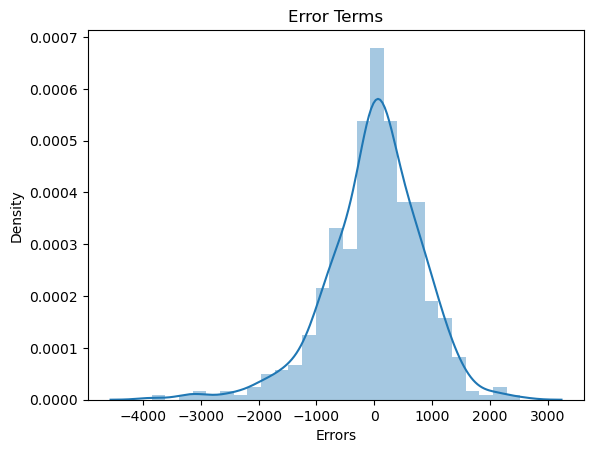

In [94]:
plot_res_dist(y_train, y_train_pred)

Errors are normally distribured here with mean 0. So everything seems to be fine

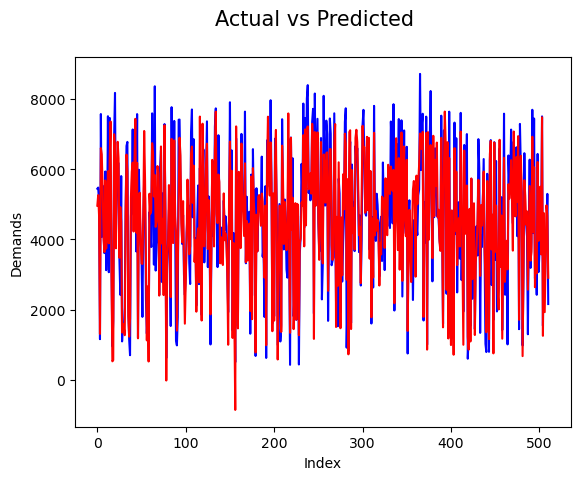

In [95]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Actual and Predicted result following almost the same pattern so this model seems ok

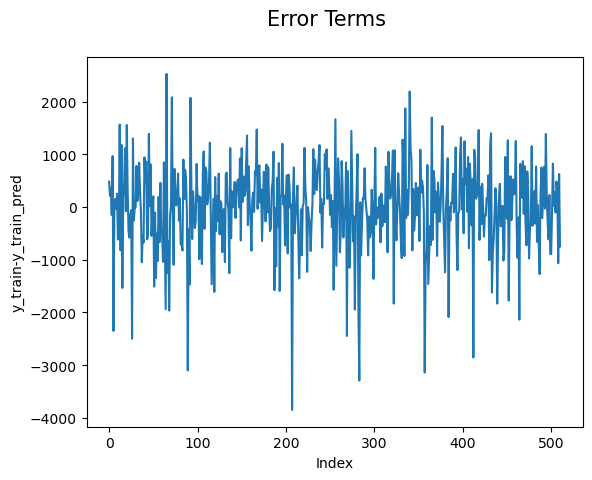

In [96]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

Here,If we see the error terms are independent of each other.

In [98]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8185359364498817

Observation:

R2 Same as we obtained for our final model

### 5.2 Linearity Check

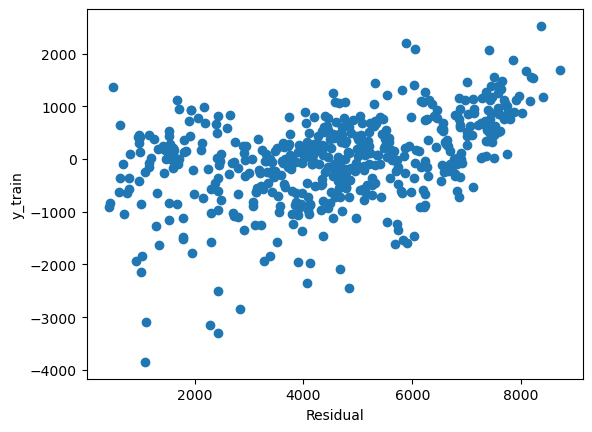

In [99]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### 5.3 Predict values for test data set


In [100]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [101]:
#Columns from our final model
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

### 5.4 R-Squared value for test predictions

In [102]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8159036088393239

Observation:

R2 value for predictions on test data (0.815) is almost same as R2 value of train data(0.818). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

### 5.5 Homoscedacity

Text(0, 0.5, 'y_test_pred')

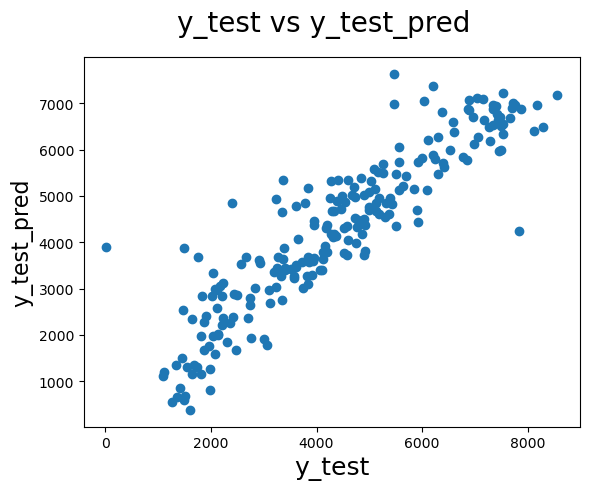

In [103]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

Observation:
    
We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

### 5.8 Plot Test vs Predicted test values

In [104]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

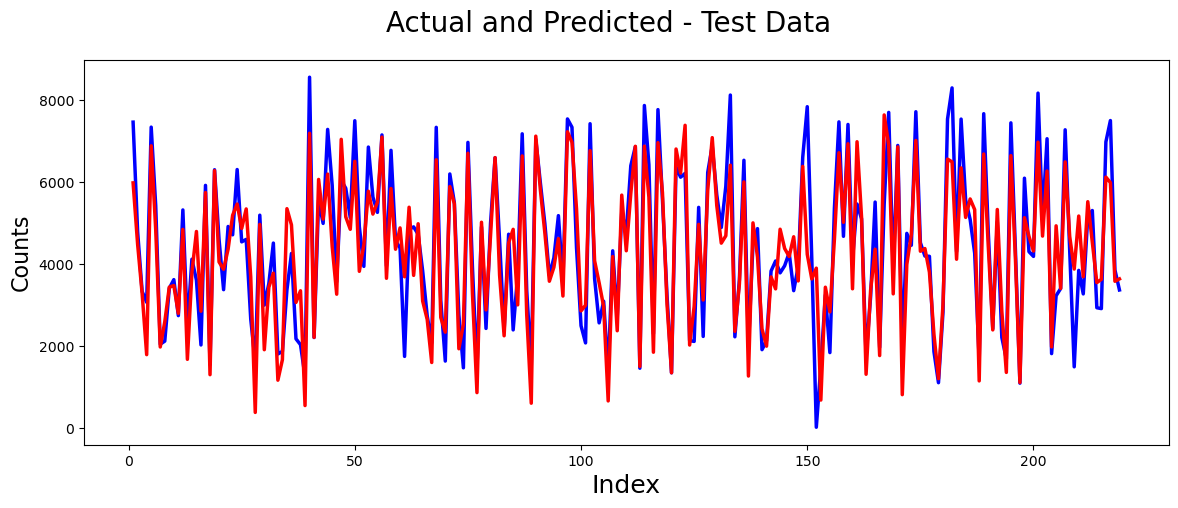

In [105]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

Observation: 
    
As we can see predictions for test data is very close to actuals

### 5.9 Plot Error Terms for test data

In [106]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

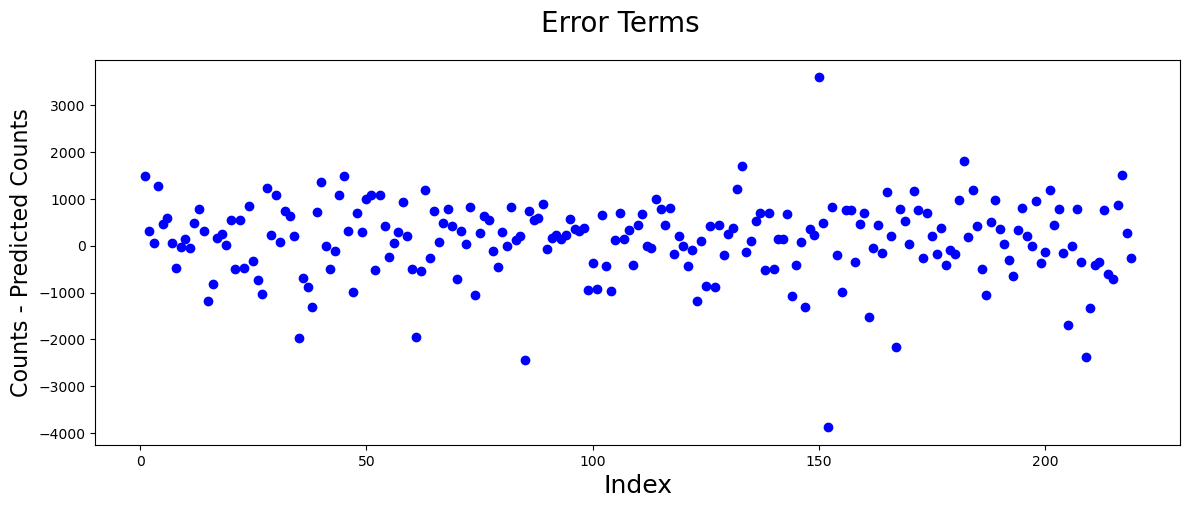

In [107]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

Observation:

As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

## 6. Making Predictions

In [109]:
# Checking data before scaling
Bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,days_old,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,0,...,False,False,True,False,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,1,...,False,False,False,True,False,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,2,...,False,True,False,False,False,False,False,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,3,...,False,False,False,False,False,True,False,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,4,...,False,False,False,False,False,False,True,False,True,False


### 6.1 Intrepretting the Model

Let us go with interpretting the RFE with Manual model results as we give more importance to imputation

In [110]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

lm = build_model(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Sun, 26 May 2024   Prob (F-statistic):          2.33e-179
Time:                        13:52:30   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1849.3111    

## Interepretation of results

### Analysing the above model, the company should focus on the following features:

 - Company should focus on expanding business during Spring.
 - Company should focus on expanding business during September.
 - Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
 - There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.

#### Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.

### Conclusion:

Significant variables to predict the demand for shared bikes

 - holiday
 - temp
 - hum
 - windspeed
 - Season
 - months(January, July, September, November, December)
 - Year (2019)
 - Sunday
 - weathersit( Light Snow, Mist + Cloudy)